In [279]:
import pandas as pd

churn = pd.read_csv('C:\DS\IDE\Skillfactory\PY_13_Визуализация_данных\churn.csv')
churn = churn.drop(['RowNumber'], axis=1)
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


**Столбцы таблицы:**

* ***RowNumber*** — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* ***CustomerId*** — идентификатор клиента
* ***Surname*** — фамилия клиента
* ***CreditScore*** — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* ***Geography*** — страна клиента (банк международный)
* ***Gender*** — пол клиента
* ***Age*** — возраст клиента
* ***Tenure*** — сколько лет клиент пользуется услугами банка
* ***Balance*** — баланс на счетах клиента в банке
* ***NumOfProducts*** — количество услуг банка, которые приобрёл клиент
* ***HasCrCard*** — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* ***IsActiveMember*** — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* ***EstimatedSalary*** — предполагаемая заработная плата клиента
* ***Exited*** — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

# Задание 9.1.
### Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

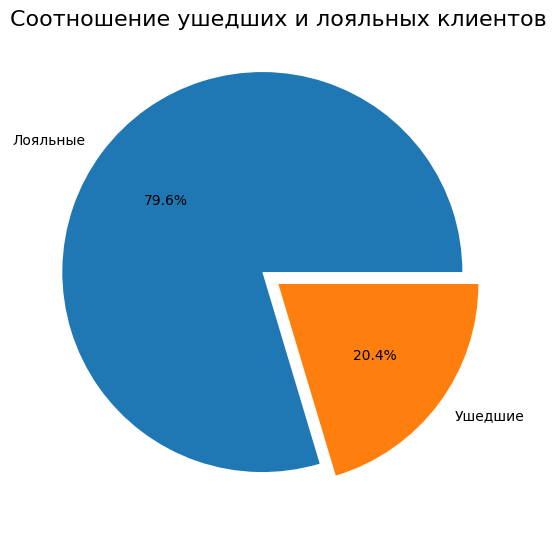

In [280]:
import matplotlib.pyplot as plt
%matplotlib inline

loyal_departed = churn['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Cоотношение ушедших и лояльных клиентов', fontsize=16)

axes.pie(loyal_departed, labels=['Лояльные', 'Ушедшие'], autopct='%.1f%%', explode = [0.1, 0]);

Из графика видно, что ушло 20.4% клиентов (пятая часть)

Большая часть клиентов лояльные

# Задание 9.2.
### Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

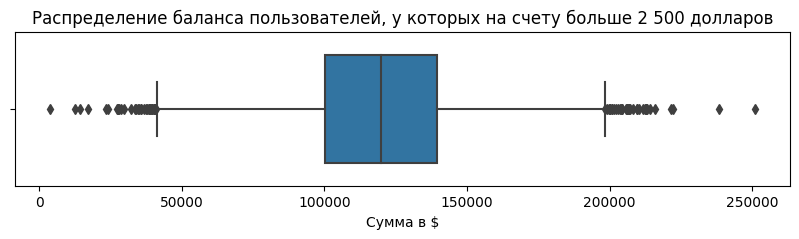

In [281]:
import seaborn as sns

balance_distribution = churn[churn['Balance'] > 2500]
balance_distribution

fig = plt.figure(figsize=(10,2))
boxplot = sns.boxplot(
    data=balance_distribution,
    x='Balance',
    width=0.7
);
boxplot.set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов');
boxplot.set_xlabel('Сумма в $');

По данному гравику видно что пользователи, на счету который более 2500$ распределяются следующим образом:

1. Межквартильный размах у них равен от 100 до 140 тыс.$

2. Основная масса пользователей лежит в диапазоне от 40 до 195 тыс.$

3. Есть выбросы, в обе стороны примерно одинаковы. Людей, который попали в выбросы на мин и макс не очень много

4. График сбалансирован и практически симетричен(за исключением выбросов). Мединана находится примерно на 120 тыс. $

Вывод: Большая часть пользователей банка держит на счету достаточно большие суммы. Если не считать пользователей с балансом менее 2500$
то можно заметить что баланс на счету начинается от 40 тыс. $. Более 200 тыс.$ пользователи не держат (за исключением выбросов). В основном, большая часть людей держит на счете в банке от 100 до 140 тыс. $

# Задание 9.3.
### Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

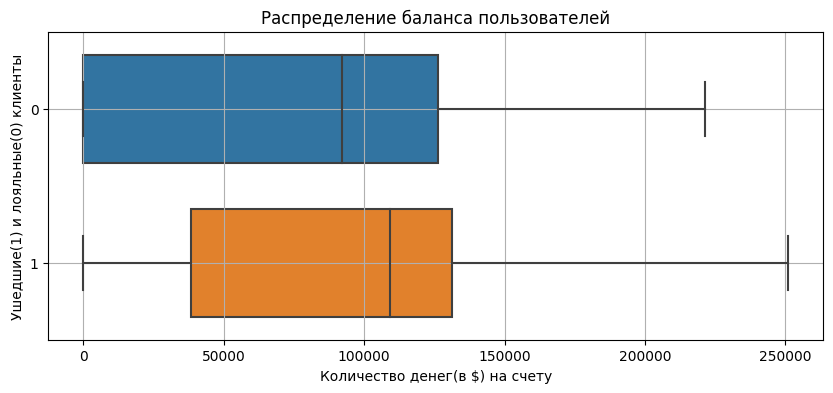

In [282]:
fig = plt.figure(figsize=(10,4))
boxplot = sns.boxplot(
    data=churn,
    x='Balance',
    y='Exited',
    orient='h',
    width=0.7
);
boxplot.set_title('Распределение баланса пользователей');
boxplot.set_xlabel('Количество денег(в $) на счету');
boxplot.set_ylabel('Ушедшие(1) и лояльные(0) клиенты');
boxplot.grid()

# Как сделть вместо 0 и 1 нормальные подписи я не нашел.

По графику видно что и медиальное значение и межквартиьный размах и "усы" больше у клиентов ушедших, следовательно ушедшие клиенты хранили суммы, превышаюшие суммы лояьных клиентов

Это может быть связано с дополнительными комиссиями на хранение больших сумм в банке

С более выгодными условиями хранения денег в других банках (например % годовых больше)

Возможно есть какието ограничения по максимальной сумме, которая может лежать в банке на 1 человека (по графику ушедших клиентов видно, что предел стоит на 250 тыс $ с небольшим, может это и есть предел суммы)



# Задание 9.4.
### Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

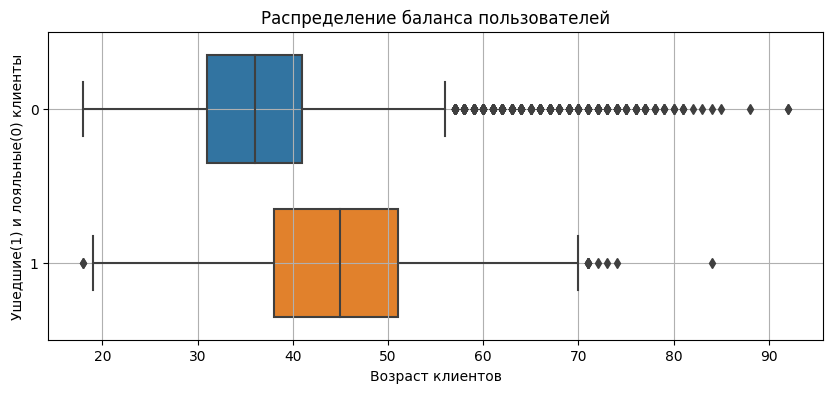

In [283]:
fig = plt.figure(figsize=(10,4))
boxplot = sns.boxplot(
    data=churn,
    x='Age',
    y='Exited',
    orient='h',
    width=0.7
);
boxplot.set_title('Распределение баланса пользователей');
boxplot.set_xlabel('Возраст клиентов');
boxplot.set_ylabel('Ушедшие(1) и лояльные(0) клиенты');
boxplot.grid()

Больше выбросов у лояльных клиентов

Но основная масса ушедших клиентов старше 38 и младше 51 года

Банку стоит обратить внимание на клиентов от 31 до 52 года, т.к нельзя забывать и про лояльных клиентов. (есть какието моменты, которые не устраивают старшее поколение 30+) Видимо банк ориенторован больше на молодежь


# Задание 9.5.
### Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

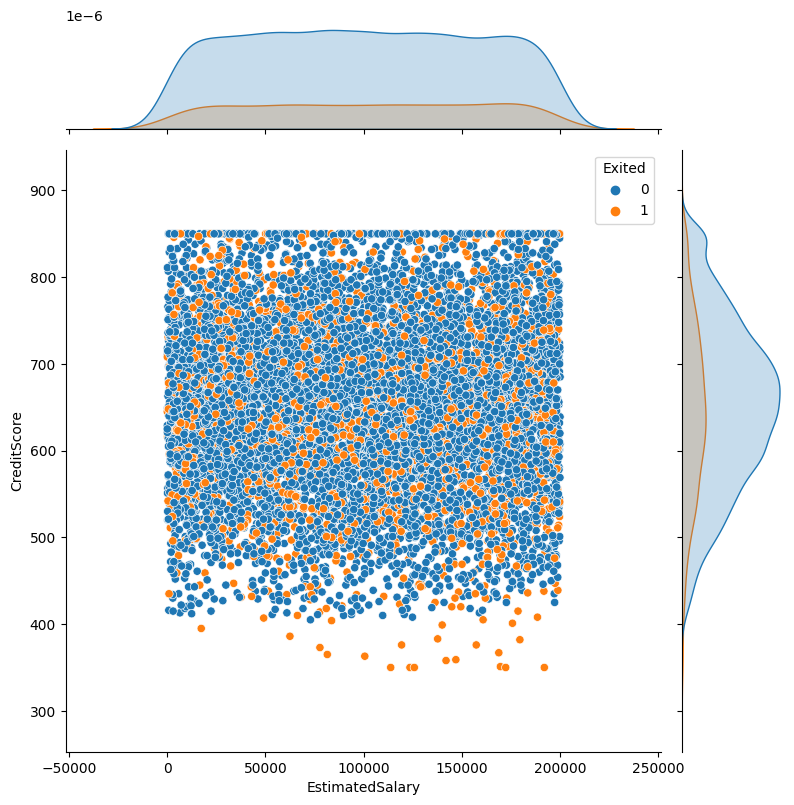

In [284]:
jointplot = sns.jointplot(
    data=churn, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited',
    height=8,
)

Лояльные клиенты = 0

Ушедшие клиенты = 1

Из графика видно, что предполагаемая зарплата никак не зависит от кредитного рейтинга как у ушедших, так и у лояльных клиентов.

Так как лояльных клиентов в банке больше, то и синих точек на графике таже будет больше

В основном кредитная история у клинтов в районе 600-700 баллов





# Задание 9.6.
### Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Text(0.5, 1.0, 'Cоотношение мужчин и женщин среди ушедших клиентов')

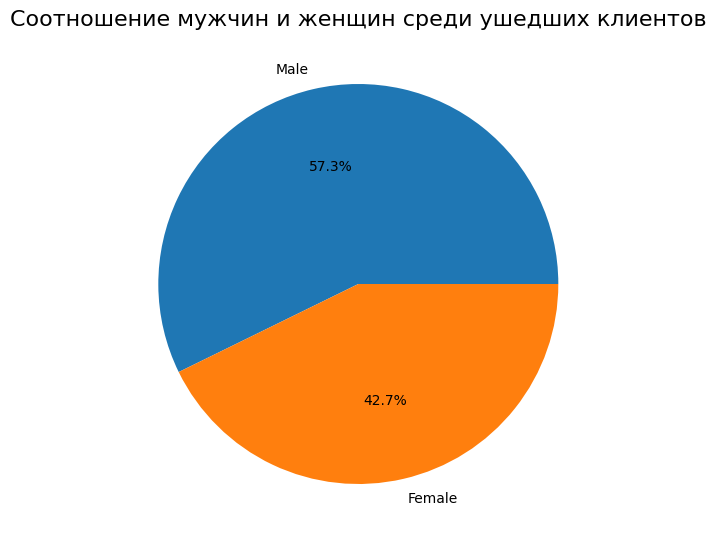

In [285]:
sorted_exited = churn[churn['Exited'] == 0]

vaccine_combinations = sorted_exited['Gender'].value_counts()

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=['Male', 'Female'],
    autopct='%.1f%%',
    explode = [0, 0]
);
axes.set_title('Cоотношение мужчин и женщин среди ушедших клиентов', fontsize=16)

Как видно по графику, среди ушедших клиентов большая часть мужчин (но доля мужчин, не очень сильно превышает долю женщин)

# Задание 9.7.
### Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [286]:
group_clients = churn.groupby(['Exited'])['NumOfProducts'].value_counts()
display(group_clients)

Exited  NumOfProducts
0       2                4242
        1                3675
        3                  46
1       1                1409
        2                 348
        3                 220
        4                  60
Name: count, dtype: int64

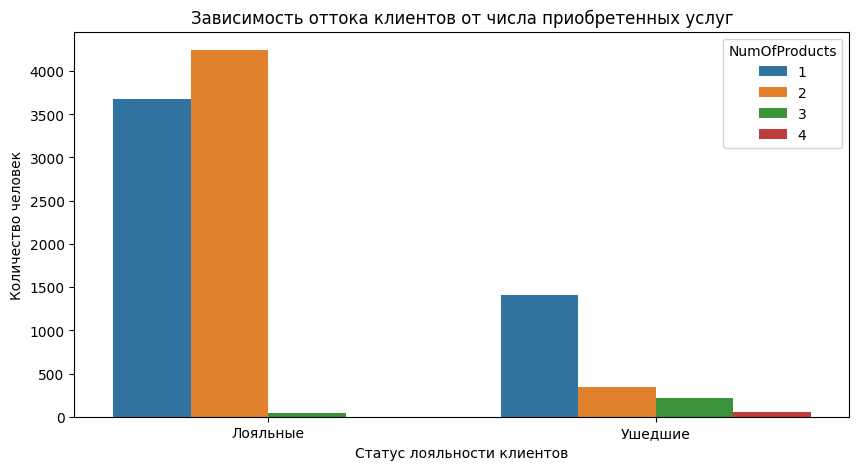

In [287]:
# group_clients = churn.groupby(['Exited'])['NumOfProducts'].value_counts()
# Сделал группировку но внедрить ее в график у меня никак не получалось, 
# поэтому я скорректировал его, и внес данные вручную
# Надеюсь будет ноутбук с эталонными решениями, чтобы посмотреть на свои ошибки
group_clients = {
    'Count':[4242, 3675, 46, 1409, 348, 220, 60],
    'NumOfProducts':[2, 1, 3, 1, 2, 3, 4],
    'Exited':['Лояльные', 'Лояльные', 'Лояльные', 'Ушедшие', 'Ушедшие', 'Ушедшие', 'Ушедшие'] }

group_clients = pd.DataFrame(group_clients)

fig = plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=group_clients,
    x='Exited',
    y='Count',
    hue='NumOfProducts'
)

barplot.set_title('Зависимость оттока клиентов от числа приобретенных услуг');
barplot.set_xlabel('Статус лояльности клиентов');
barplot.set_ylabel('Количество человек');

По графику видно, что у лояльных клиентов преобладает 1 и 2 услуги.

У ушедших клиентов наиболее выделяется 1 услуга, но также можно заметить, что 3 услуги приобрели больше ушедшихклиентов чем лояльных

Также видно, что 4 услуги приобрели только ушедшие клиенты, лояльные приобретали максимум 3

Можно сделать вывод, что чем меньше услуг приобретает клиент, тем выше вероятность его ухода

# Задание 9.8. 
### Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [288]:
group_clients_active = churn.groupby(['Exited'])['IsActiveMember'].value_counts()
display(group_clients_active)


Exited  IsActiveMember
0       1                 4416
        0                 3547
1       0                 1302
        1                  735
Name: count, dtype: int64

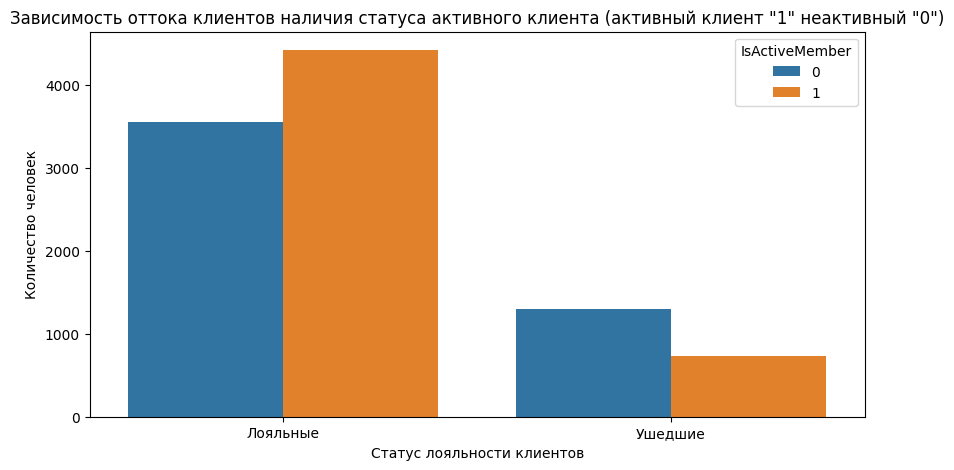

In [289]:
group_clients_active = {
    'Count':[4416, 3547, 1302, 735],
    'IsActiveMember':[1, 0, 0, 1],
    'Exited':['Лояльные', 'Лояльные', 'Ушедшие', 'Ушедшие'] }

group_clients_active = pd.DataFrame(group_clients_active)

fig = plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=group_clients_active,
    x='Exited',
    y='Count',
    hue='IsActiveMember'
)

barplot.set_title('Зависимость оттока клиентов наличия статуса активного клиента (активный клиент "1" неактивный "0")');
barplot.set_xlabel('Статус лояльности клиентов');
barplot.set_ylabel('Количество человек');

Как видно по графику, у лояльных клиентов статус активного клиента  есть более чем у 50% пользователей

Среди ушедших клиентов такой статус есть только примерно у 35% пользователей

Можно сделать вывод учто чаще уходят клиенты, которые не имеют статуса акстивного клиента

Банку можно предложить более простой способ получения данного статуса, чтоб больше клиентов его имени. 
И чтобы были бонусы которые держали бы клиентов конкретно в этом банке. по графику видно что примерно 35% пользователей имели данный статус и всеравно ушли. Возможно они нашли более выгодные условия в другом банке



# Задание 9.9. 
### В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [290]:
country_exited = churn.groupby(['Geography'])['Exited'].value_counts()
display(country_exited)

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: count, dtype: int64

In [291]:
import plotly
import plotly.express as px

country_exited = {
    'Geography':['France','Germany', 'Spain'],
    'Exited':[1, 1, 1],
    'CountPeople':[810, 814, 413] }

country_exited = pd.DataFrame(country_exited)

country_exited = country_exited.sort_values(by='Geography')

#строим график
fig = px.choropleth(
    data_frame=country_exited, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="CountPeople", #от чего зависит цвет
    #animation_frame="CountPeople", #анимационный бегунок
    range_color=[0, 1e3], #диапазон цвета
    title='Ушедшие клиенты по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

Ушедших клиентов больше всего в Германии(814 человек) и Франции(810 человек), в Испании этот показатель меньше (413 человек)

# Если в задании имелось в виду соотношение ушедших и неушедших то решение ниже

In [292]:
country_exited_2 = churn.groupby(['Geography'])['Exited'].value_counts()
display(country_exited_2)

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: count, dtype: int64

In [293]:
country_exited_2 = {
    'Geography':['France','Germany', 'Spain'],
    'Exited':[1, 1, 1],
    'CountPeople':[(810*100/(810+4204)), (814*100/(814+1695)), (413*100/(413+2064))] }

country_exited_2 = pd.DataFrame(country_exited_2)

country_exited_2 = country_exited_2.sort_values(by='Geography')

#строим график
fig = px.choropleth(
    data_frame=country_exited_2, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="CountPeople", #от чего зависит цвет
    #animation_frame="CountPeople", #анимационный бегунок
    range_color=[0, 1e2], #диапазон цвета
    title='Ушедшие клиенты по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

Вывод, среди немцев ушло примерно 32.5% клиентов, среди Французов и Испанцев примерно 16-16.5% клиентов. Доля ушедших клиентов среди немцев наибольшая. Банку стоит обратить внимание на граждан данной страны.

# Задание 9.10. 
### Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [294]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

### Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

### На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

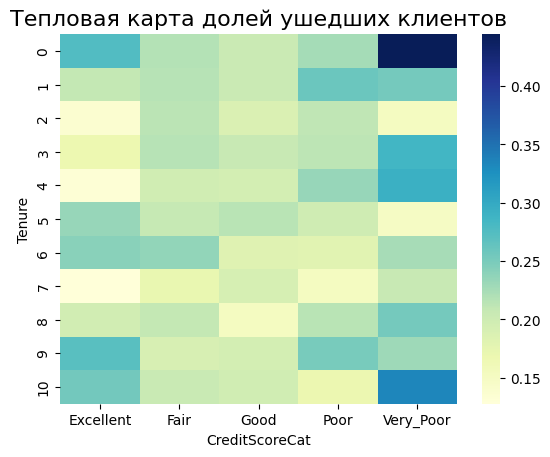

In [295]:
churn['CreditScoreCat'] = churn['CreditScore'].apply(get_credit_score_cat)

CreditScoreCat = churn.pivot_table(
    values='Exited',
    index='Tenure',
    columns='CreditScoreCat',
    fill_value=0
)

heatmap = sns.heatmap(data=CreditScoreCat, cmap='YlGnBu')
heatmap.set_title('Тепловая карта долей ушедших клиентов', fontsize=16);

Как видно по графику, клиенты реже уходят с повышением количества лет пользования банком

Также можно заметить, что доля клиентов с кредитной историей Very_Poor Самая высокая, а именно новых клиентов

Также видно что и клиенты которые уже давно пользовались банком и имени крединую историю Very_Poor тоже достаточно чато уходят, (клиенты которые пользовались банком 3, 4 и 10 лет)

Клиенты с кредитной историей Poor уходят пореже, чем меньше время использования банка тем это ярче выражается, но периодами (возможно это связано с какимито событиями в стране(война, кризис и тд.)

Как ни странно, клиенты с кредитной истоией Excellent уходят чаче чем клиенты Poor

Наиболее стабильные клиенты не смотря на количество лет использования банка это клиенты с кредитной историей Good

Вывод: чаще всего уходят клиенты с кредитной историе Excellent и Very_Poor с временем использования банка 0-1 год, 3-6, и 10 лет
А если быть более точным то чаще уходят кличенты именно с кредитной историей Very_Poor, Клиенты Excellent уходят реже (они на 2 месте по доле ухода)

Клиенты Fair, Good уходят реже других , несмотря на количество лет пользования банком